In [ ]:
import pandas as pd #for importing dataset
import numpy as nm #for doing mathematical operations
from sklearn.model_selection import train_test_split as ttp #to break dataset for training and testing
from sklearn.metrics import classification_report # to generate classification report
import re #for data cleaning purpose
import string #to deal with text data
import matplotlib.pyplot as plt #for visualizing dataset

In [ ]:
data_true=pd.read_csv("/content/true-copy.csv")
data_fake=pd.read_csv("/content/false-copy.csv")

In [ ]:
data_true.head(5)

,title,location,employment_type,required_experience,required_education
0,Quality & Continuous Improvement Manager - Six...,"US, TX, Houston",Full-time,NaN,NaN
1,Software Developer,"US, NY, Farmingdale",Full-time,Associate,Bachelor's Degree
2,Marketing Manager,"US, CA, Los Angeles",NaN,NaN,NaN
3,Solutions Architect-Enterprise Information Man...,"US, TX, Dallas",Full-time,NaN,Bachelor's Degree
4,DevOps Engineer,"US, TX, Dallas",Contract,NaN,Bachelor's Degree


In [ ]:
data_fake.head(5)

,title,location,employment_type,required_experience,required_education
0,Marketing Intern,"US, NY, New York",Other,Internship,NaN
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Full-time,Not Applicable,NaN
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,NaN
3,Account Executive - Washington DC,"US, DC, Washington",Full-time,Mid-Senior level,Bachelor's Degree
4,Bill Review Manager,"US, FL, Fort Worth",Full-time,Mid-Senior level,Bachelor's Degree


In [ ]:
data_true.shape


(8939, 5)

In [ ]:
data_fake.shape


(8939, 5)

ADDING COLUMN ['CLASS'] IN BOTH DATASETS

In [ ]:
data_true["class"]=1
data_fake["class"]=0

In [ ]:
#data_true_manual_testing = data_true.tail(9)
#for i in range(8939,8930,-1):
#data_true.drop([i],axis=0, inplace=True)

#data_fake_manual_testing = data_fake.tail(9)
#for i in range(8939,8930,-1):
 #   data_fake.drop([i],axis=0, inplace=True)

In [ ]:
#data_manual_testing = pd.concat([data_fake_manual_testing, data_true_manual_testing], axis=0)
#data_manual_testing.to_csv("manual_testing.csv ")

MERGING MAIN TWO DATASETS

In [ ]:
data_merge = pd.concat([data_fake,data_true],axis=0)
data_merge.head(10)

,title,location,employment_type,required_experience,required_education,class
0,Marketing Intern,"US, NY, New York",Other,Internship,NaN,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Full-time,Not Applicable,NaN,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Full-time,Mid-Senior level,Bachelor's Degree,0
4,Bill Review Manager,"US, FL, Fort Worth",Full-time,Mid-Senior level,Bachelor's Degree,0
5,Accounting Clerk,"US, MD,",NaN,NaN,NaN,0
6,Head of Content (m/f),"DE, BE, Berlin",Full-time,Mid-Senior level,Master's Degree,0
7,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,NaN,NaN,0
8,HP BSM SME,"US, FL, Pensacola",Full-time,Associate,NaN,0
9,Customer Service Associate - Part Time,"US, AZ, Phoenix",Part-time,Entry level,High School or equivalent,0


PERFORMING SOME PLOTTINGS

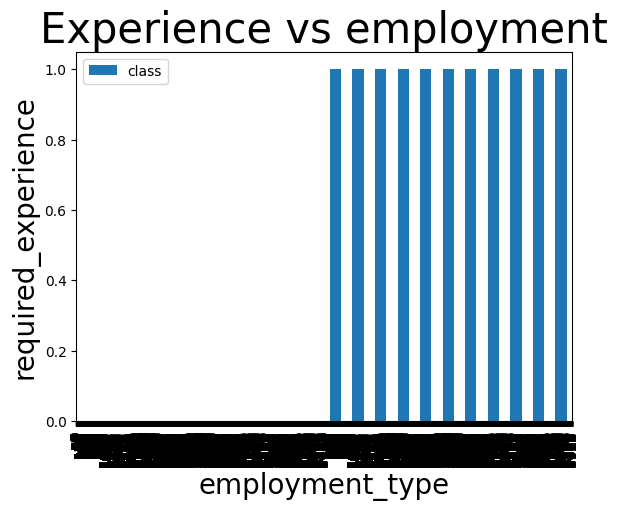

In [ ]:
#print(data_merge.groupby(['title'])['location'].count())
data_merge.plot(kind="bar")
plt.title("Experience vs employment",size=30)
plt.xlabel("employment_type",size=20)
plt.ylabel("required_experience",size=20)
plt.show()

0 = Fake jobs
1 = True news


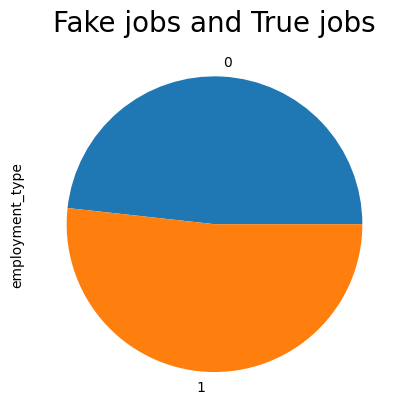

In [ ]:
#print(data_merge.groupby(['class'])['text'].count())
print("0 = Fake jobs\n1 = True news")
data_merge.groupby(['class'])['employment_type'].count().plot(kind="pie")
plt.title("Fake jobs and True jobs",size=20)
plt.show()

REMOVING 3 COLUMNS FROM DATASET

In [ ]:
data = data_merge.drop(["required_education","required_experience"], axis=1)
data.head(10) #displaying remaining dataset

,title,location,employment_type,class
0,Marketing Intern,"US, NY, New York",Other,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Full-time,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Full-time,0
4,Bill Review Manager,"US, FL, Fort Worth",Full-time,0
5,Accounting Clerk,"US, MD,",NaN,0
6,Head of Content (m/f),"DE, BE, Berlin",Full-time,0
7,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,0
8,HP BSM SME,"US, FL, Pensacola",Full-time,0
9,Customer Service Associate - Part Time,"US, AZ, Phoenix",Part-time,0


SHUFFLING FOR BETTER PREDICTION

In [ ]:
data=data.sample(frac=1)
data.head(10)

,title,location,employment_type,class
5246,Salon Operations Manager (of Grooming Salon),"US, CA, West Hollywood",NaN,1
6697,Senior Designer,"IE, L, Dublin",Full-time,0
4227,Mid-level Airframe Structures Design Engineer,"US, MI, Ann Arbor",Full-time,1
3003,Front End Developer,"GR, I, Chalandri",Full-time,1
7580,Welder,"US, FL, Miami",Contract,0
7391,Functional Business Analyst,"BE, , Brussels",Full-time,0
7227,Process Engineer,"US, CA, Los Angeles",Full-time,1
6873,Care Assistant - Meigle,"GB, PKN, Meigle",Full-time,0
2255,Business Development Intern,"US, NY, Brooklyn",Part-time,0
4492,C++ Developer,"US, TX, Austin",NaN,0


CHECKING FOR NULL VALUES IN DATASET

In [ ]:
data.isnull().sum()

title                 0
location            346
employment_type    3471
class                 0
dtype: int64